<a href="https://colab.research.google.com/github/sevvalbicerr/GlobalAIHub--FinalProject/blob/main/CreateSpectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from pathlib import Path
import numpy as np
import librosa 
import librosa.display
import IPython.display as ipd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
audio_path="/content/drive/MyDrive/DeepLearningBootcamp/Dataset/Audio/UrbanSound8K/audio"
spectrogram_path="/content/drive/MyDrive/DeepLearningBootcamp/Dataset/Spectrograms"


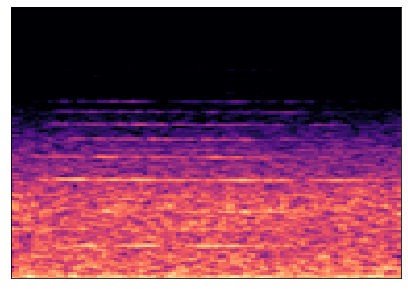

In [ ]:
test="/content/drive/MyDrive/DeepLearningBootcamp/Dataset/Audio/UrbanSound8K/audio/fold4/204765-1-0-0.wav"
x,sr=librosa.load(test)
Spec = librosa.feature.melspectrogram(x)
spec_conv = librosa.amplitude_to_db(Spec, ref=np.max)
plt.figure(figsize=(7, 5))
librosa.display.specshow(spec_conv)
save_path = "/content/drive/MyDrive/DeepLearningBootcamp/Dataset/Spectrograms"
#plt.savefig(save_path, bbox_inches=None, pad_inches=0)

In [ ]:
i = 0
while i<=9:
  spectogramfolder = f"{spectrogram_path}/{i}"
  isExist = os.path.exists(spectogramfolder)
  if not isExist:
    os.makedirs(spectogramfolder)
  i+=1

In [ ]:
def create_spectrogram(audio_file,folder):
  #test="/content/drive/MyDrive/DeepLearningBootcamp/Dataset/Audio/UrbanSound8K/audio/fold4/204765-1-0-0.wav"
  x,sr=librosa.load(audio_file)
  Spec = librosa.feature.melspectrogram(x)
  spec_conv = librosa.amplitude_to_db(Spec, ref=np.max)
  plt.figure(figsize=(7, 5))
  librosa.display.specshow(spec_conv)
  save_path = f"{spectrogram_path}/{Path(audio_file).stem.split('-')[folder]}/{Path(audio_file).stem}.png"
  plt.savefig(save_path, bbox_inches=None, pad_inches=0)
  
  

In [ ]:
spectogram_num = 0
fold_num=0
for folder in os.listdir(audio_path):
  isDir = os.path.isdir(f"{audio_path}/{folder}")
  if isDir:
      for audio in os.listdir(f"{audio_path}/{folder}"):
        if audio.endswith(".wav"):
          spectogram_num+=1
          create_spectrogram(f"{audio_path}/{folder}/{audio}",folder)
          print(f"\rNum of spectograms: {spectogram_num}", end ="")
 